<center><h1> <font color="green"><u>Active-Case Predictions ~ 19-nCoV</u></font> </h1></center>

<center><h3> <font color="#cc0000"><u>Active Cases(%) out of Confirmed</u></font> </h3></center>

<h3> <font color="purple"><u>This section includes:</u></font> </h3>

> * Data Filtering <br />
> * Training & Testing datasets <br />
> * Prediction <br />
> * Visualization (Scatter Plots) <br />

<br />

## Creating Datasets

In [1]:
# setting the working directory
setwd("~/Documents/A-tracking-of-2019-nCoV/COVID-19/ready_to_use")

In [2]:
# Loading desired libraries
library(ggplot2)
library(stringr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



<hr />

In [3]:
# includes data of all the countries
all = read.csv('COVID-19/Mixed/countryWise_bulk_summary.csv')

# includes data of four majour location
four = read.csv('COVID-19/FOUR/Four_dataset_locationWise.csv')

In [4]:

# extracting the desired dataset
extractDatases <- function(region){
    if(region %in% c("Hubei", "World", "Diamond Princess")) {
    temp = four[which(str_detect(four$Location, region)),]
    row.names(temp) <- NULL
} else {
    temp = all[which(str_detect(all$Country, region)),]
    row.names(temp) <- NULL
}

return(temp)
}


In [5]:
# country list
countries = matrix(levels(as.factor(all$Country)))
#head(countries, 10)

# Four majour locations
locations = matrix(levels(as.factor(four$Location)))
#locations

<br /> 
### Choosing desired Country/Region

In [6]:
# country i.e. to be used throughout the analysis
 rName = "China" # without hubei

# some other possible values of rName:
# 'World', 'Hubei', 'Diamond Cruise', 'Italy', 'Japan'.....etc

<hr />

In [7]:
# filtering out desired country/location 
region = extractDatases(rName)

head(region)

Country,Day,Date,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases
China,1,22-01-2020,104,0,0,104,0
China,2,23-01-2020,199,1,2,196,3
China,3,24-01-2020,371,2,5,364,7
China,4,25-01-2020,645,2,7,636,9
China,5,26-01-2020,1017,4,7,1006,11
China,6,27-01-2020,1454,6,13,1435,19


<hr />

In [8]:
region=region[,c(2, 4:8)]
head(region, 10)

Day,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases
1,104,0,0,104,0
2,199,1,2,196,3
3,371,2,5,364,7
4,645,2,7,636,9
5,1017,4,7,1006,11
6,1454,6,13,1435,19
7,1955,6,21,1928,27
8,2533,8,32,2493,40
9,3238,9,45,3184,54
10,3996,9,73,3914,82


In [9]:
# calculate the percent (using Confirmed cases as total)
percent <- function(dfName){
    get(dfName) -> df
    part <- NULL
    
    for(i in 1:nrow(df)) {
        val = df[i,"Active.Cases"]
        Total = df[i,"Confirmed"]
        
        
        if(i == 1)
            if(val==0)
                part = 0
            else
                part = as.numeric((val*100)/Total)
        else
            if(val==0)
                part = c(part, 0)
            else
                part <- c(part, as.numeric((val*100)/Total))
    }
        
    return(part)
}

<hr />

In [10]:
# CASES -> percentage
region$'percent_active' = percent("region")     # Active cases, out of every 100 Confirmed cases
region$'percent_closed' = 100-percent("region") # Closed cases, out of every 100 Confirmed cases

In [11]:
head(region)

Day,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases,percent_active,percent_closed
1,104,0,0,104,0,100.00000,0.000000
2,199,1,2,196,3,98.49246,1.507538
3,371,2,5,364,7,98.11321,1.886792
4,645,2,7,636,9,98.60465,1.395349
5,1017,4,7,1006,11,98.91839,1.081613
6,1454,6,13,1435,19,98.69326,1.306740


<br />* Dataset is ready

<hr /><br />

### Understanding the plot

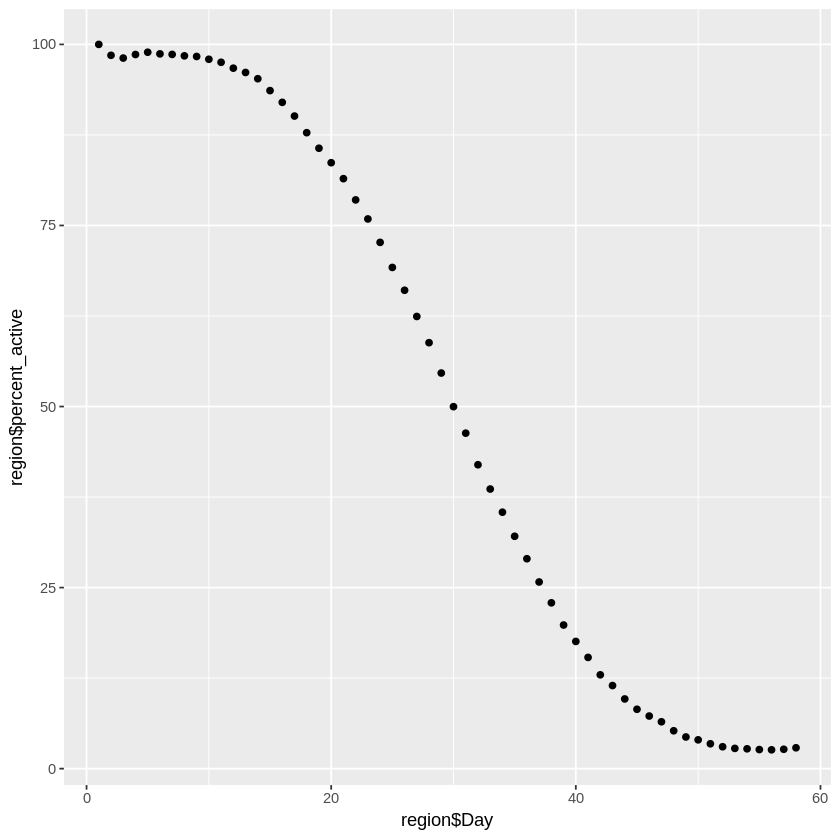

In [12]:
# Day vs %Closed Cases
region.scatter.plot <- ggplot(region, aes(x = region$Day, y = region$percent_active)) +
                        geom_point()
region.scatter.plot

In [13]:
tail(region)

,Day,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases,percent_active,percent_closed
53,53,13187,118,12700,369,12818,2.798210,97.20179
54,54,13209,118,12729,362,12847,2.740556,97.25944
55,55,13235,118,12768,349,12886,2.636947,97.36305
56,56,13259,119,12795,345,12914,2.602006,97.39799
57,57,13303,119,12828,356,12947,2.676088,97.32391
58,58,13357,119,12853,385,12972,2.882384,97.11762


In [14]:
fit = lm(percent_active ~ ., data = region, )
summary(fit)

Warning message in summary.lm(fit):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = percent_active ~ ., data = region)

Residuals:
       Min         1Q     Median         3Q        Max 
-9.237e-14 -7.731e-15  8.290e-16  1.260e-14  2.333e-14 

Coefficients: (2 not defined because of singularities)
                 Estimate Std. Error    t value Pr(>|t|)    
(Intercept)     1.000e+02  1.202e-14  8.319e+15  < 2e-16 ***
Day             5.221e-15  1.270e-15  4.112e+00 0.000140 ***
Confirmed      -1.250e-17  4.269e-18 -2.927e+00 0.005067 ** 
Deaths          1.049e-15  4.976e-16  2.108e+00 0.039893 *  
Recovered      -2.234e-16  6.176e-17 -3.617e+00 0.000674 ***
Active.Cases           NA         NA         NA       NA    
Closed.Cases           NA         NA         NA       NA    
percent_closed -1.000e+00  7.930e-15 -1.261e+14  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.804e-14 on 52 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 5.204e+31 on 5 and 

In [17]:
r2 <- four[,c(1, 4, 7)]

# CASES -> percentage
r2$'percent_active' = percent("r2")     # Active cases, out of every 100 Confirmed cases
r2$'percent_closed' = 100-percent("r2") # Closed cases, out of every 100 Confirmed cases

r2 = r2[,1:4]
r2

Location,Confirmed,Active.Cases,percent_active
Hubei,444,399,89.86486
Hubei,444,399,89.86486
Hubei,549,494,89.98179
Hubei,761,689,90.53876
Hubei,1058,964,91.11531
Hubei,1423,1302,91.49684
Hubei,3554,3349,94.23185
Hubei,3554,3341,94.00675
Hubei,4903,4651,94.86029
Hubei,5806,5461,94.05787


In [18]:
r2$Location = as.factor(r2$Location)
str(r2)
levels(r2$Location)

'data.frame':	232 obs. of  4 variables:
 $ Location      : Factor w/ 4 levels "China","Diamond Princess",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Confirmed     : int  444 444 549 761 1058 1423 3554 3554 4903 5806 ...
 $ Active.Cases  : int  399 399 494 689 964 1302 3349 3341 4651 5461 ...
 $ percent_active: num  89.9 89.9 90 90.5 91.1 ...


[1] "China"            "Diamond Princess" "Hubei"            "World"

In [19]:
library(caret)
library(klaR)
# load the iris dataset
#data(iris)

split=0.80
trainIndex <- createDataPartition(r2$Location, p=split, list=FALSE)
data_train <- r2[ trainIndex,]
data_test <- r2[-trainIndex,]

#str(r2)
# train a naive bayes model
model <- NaiveBayes(Location~., data=data_train)

# make predictions
x_test <- data_test[,2:4]
y_test <- data_test[,1]

head(x_test)
y_test
predictions <- predict(model, x_test)

# summarize results
#confusionMatrix(predictions$class, y_test)

Loading required package: lattice

Loading required package: MASS



,Confirmed,Active.Cases,percent_active
12,11177,10532,94.22922
14,16678,15677,93.99808
17,24953,23139,92.73033
19,29631,26965,91.00267
23,48206,43437,90.10704
26,58182,49847,85.67426


[1] Hubei            Hubei            Hubei            Hubei           
 [5] Hubei            Hubei            Hubei            Hubei           
 [9] Hubei            Hubei            Hubei            China           
[13] China            China            China            China           
[17] China            China            China            China           
[21] China            China            World            World           
[25] World            World            World            World           
[29] World            World            World            World           
[33] World            Diamond Princess Diamond Princess Diamond Princess
[37] Diamond Princess Diamond Princess Diamond Princess Diamond Princess
[41] Diamond Princess Diamond Princess Diamond Princess Diamond Princess
Levels: China Diamond Princess Hubei World

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 1”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 2”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 3”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 4”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 5”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 6”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 7”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 8”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 9”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 10”
Warning message in 

<br /><hr /><br />

## Data-Analysis <br />

In [20]:
# loading plotting/machine learning
library(tidyverse)
library(caret)

# setting the theme
theme_set(theme_classic())

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ tibble  2.1.1     ✔ purrr   0.3.3
✔ tidyr   1.0.2     ✔ dplyr   0.8.3
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
✖ dplyr::select() masks MASS::select()



In [21]:
set.seed(20) # generages same set of random sample every time

training.samples <- region$Day %>%
  createDataPartition(p = 0.8, list = FALSE)

train.data  <- region[training.samples, ]
test.data <- region[-training.samples, ]

In [22]:
head(train.data, 3)
head(test.data, 3)

Day,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases,percent_active,percent_closed
1,104,0,0,104,0,100.00000,0.000000
2,199,1,2,196,3,98.49246,1.507538
3,371,2,5,364,7,98.11321,1.886792


,Day,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases,percent_active,percent_closed
4,4,645,2,7,636,9,98.60465,1.395349
13,13,6194,11,229,5954,240,96.12528,3.874717
15,15,7775,14,482,7279,496,93.62058,6.379421


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



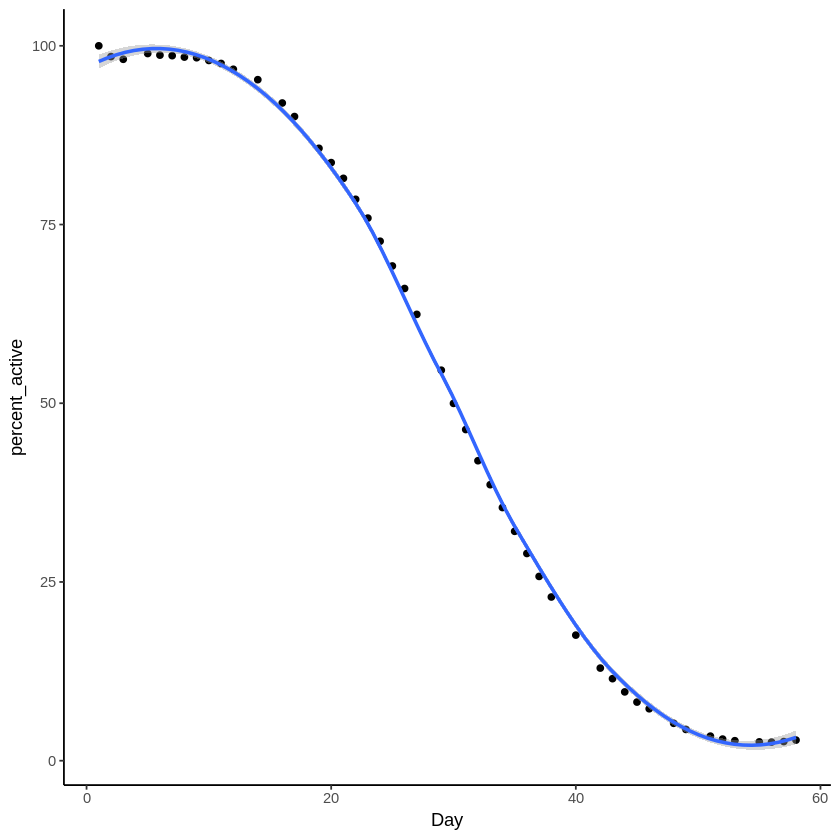

In [23]:
ggplot(train.data, aes(Day, percent_active) ) +
  geom_point() +
  stat_smooth()

<br /><hr /><br />

## Regrassion

1. ### Linear regression

In [24]:
# y = x
# Build the model

# pridiction by linear model
fit = lm(Day ~ percent_active, data = train.data)

In [25]:
# Predicting
predictions <- fit %>% predict(train.data)

In [26]:
# Model performance
data.frame(
  RMSE = RMSE(predictions, train.data$Day),
  R2 = R2(predictions, train.data$Day)
)

RMSE,R2
3.698712,0.951119


<br />

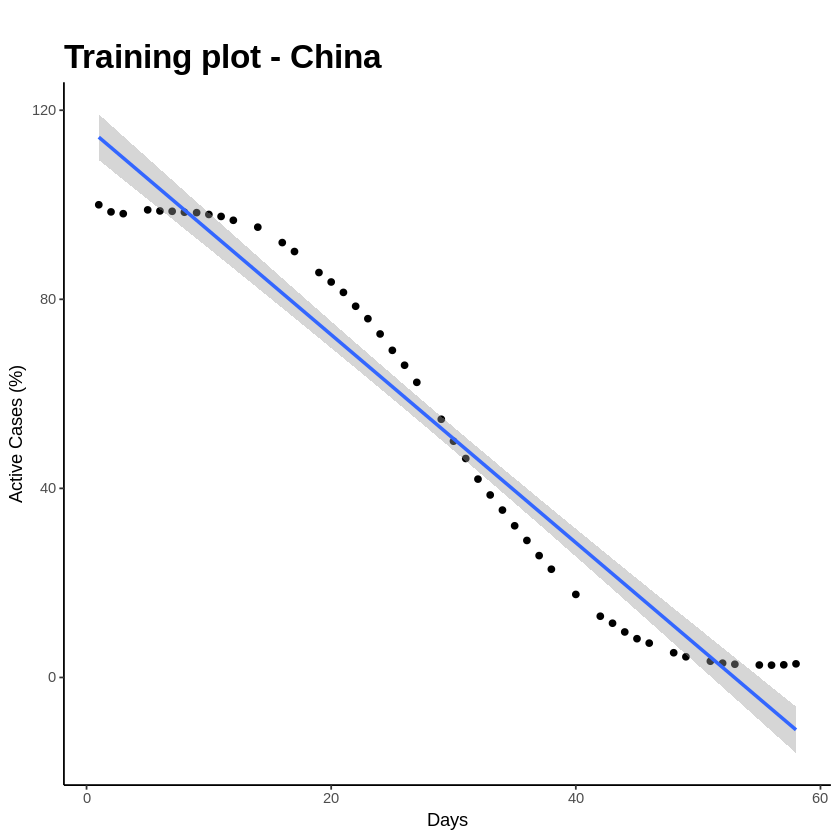

In [27]:
trainer <- ggplot(train.data, aes(Day, percent_active) ) +
              geom_point() +
              stat_smooth(method = lm, formula = y ~ x) +   # linear function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTraining plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
trainer

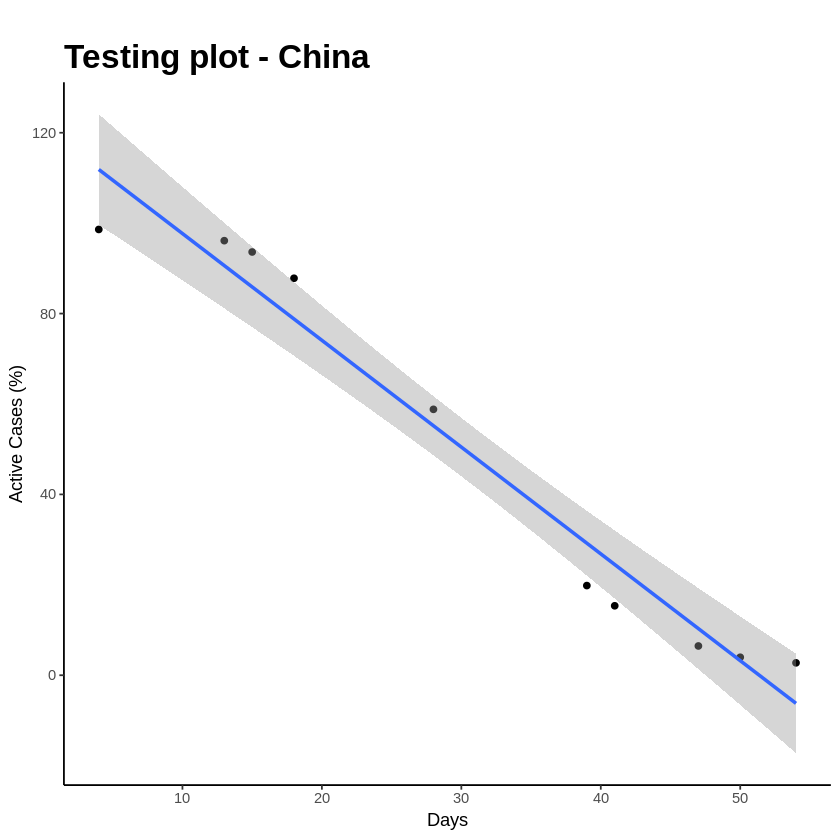

In [28]:
tester <- ggplot(test.data, aes(Day, percent_active) ) +
              geom_point() +
              stat_smooth(method = lm, formula = y ~ x) +   # linear function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTesting plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
tester

In [29]:

### can be TESTED in case of any problem in the ABOVE PLOT ###

#  # pridiction by linear model
#  pred <- predict(fit)   # fitting the model
#
#  plot(percent_active ~ Day, data = test.data)     #  "data = train.data"    is also possible
#  lines(train.data$Day, y=pred, col = "blue")


<br />

In [30]:
trained = cbind( # Prediction for training data
            train.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit, train.data)
          )

tested = cbind(  # Prediction for tested data
            test.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(fit, test.data)
         )


tail(trained, 10)
tail(tested, 10)

,Day,percent_active,Pridicted_percent_active
46,46,7.264957,48.66021
48,48,5.229854,49.54015
49,49,4.372667,49.91078
51,51,3.437001,50.31535
52,52,3.024546,50.49369
53,53,2.798210,50.59155
55,55,2.636947,50.66128
56,56,2.602006,50.67639
57,57,2.676088,50.64435
58,58,2.882384,50.55515


,Day,percent_active,Pridicted_percent_active
4,4,98.604651,9.166548
13,13,96.125283,10.238583
15,15,93.620579,11.321572
18,18,87.811406,13.833355
28,28,58.815548,26.370649
39,39,19.832552,43.226203
41,41,15.361007,45.159620
47,47,6.473010,49.002632
50,50,3.977791,50.081520
54,54,2.740556,50.616479


<br />

2. ### Polynomial regression

In [31]:
# y = x + I(x^2)...   ---->   a polynomial function
deg = 16  # degree of polynomial

# better and alternate way for line i.e. above
model = lm(percent_active ~ poly(Day, deg, raw = TRUE), data = train.data)

In [32]:
#head(test.data)
#head(train.data)

In [33]:
predictions <- model %>% predict(train.data)

Warning message in predict.lm(., train.data):
“prediction from a rank-deficient fit may be misleading”


In [34]:
# Model performance
data.frame(
  RMSE = RMSE(predictions, train.data$Day),
  R2 = R2(predictions, train.data$Day)
)

RMSE,R2
58.87277,0.9511412


<br /><br />

Warning message in predict.lm(model, newdata = data.frame(x = xseq), se.fit = se, :
“prediction from a rank-deficient fit may be misleading”


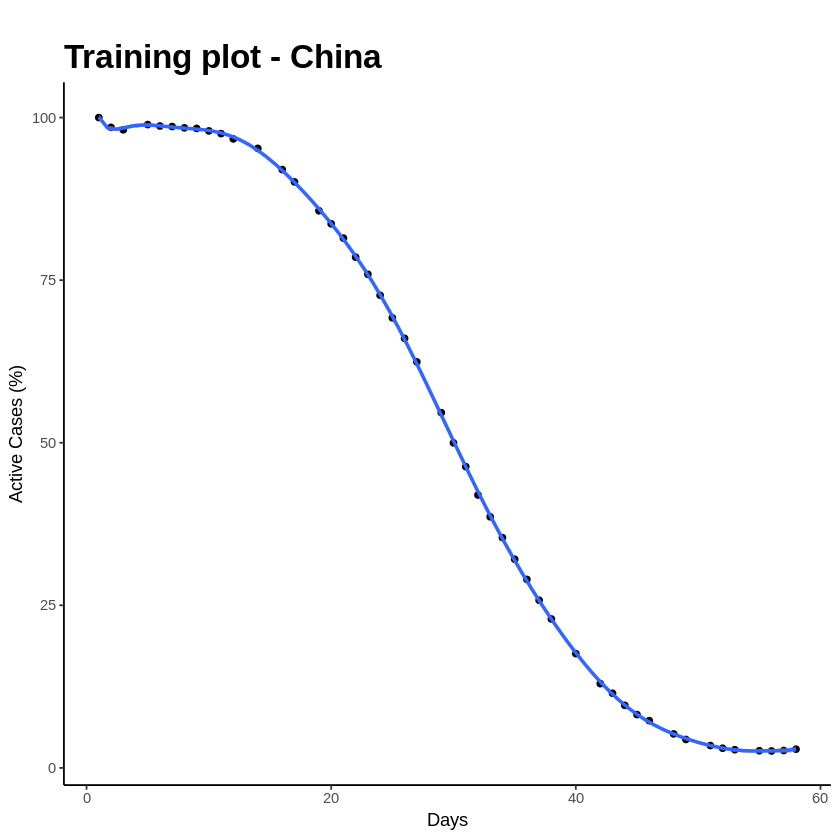

In [35]:
trainer <- ggplot(train.data, aes(Day, percent_active) ) +
              geom_point() +
              stat_smooth(method = lm, formula = y ~ poly(x, deg, raw = TRUE)) +   # polynomial function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTraining plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
trainer

Warning message in predict.lm(model, newdata = data.frame(x = xseq), se.fit = se, :
“prediction from a rank-deficient fit may be misleading”
Warning message in qt((1 - level)/2, df):
“NaNs produced”


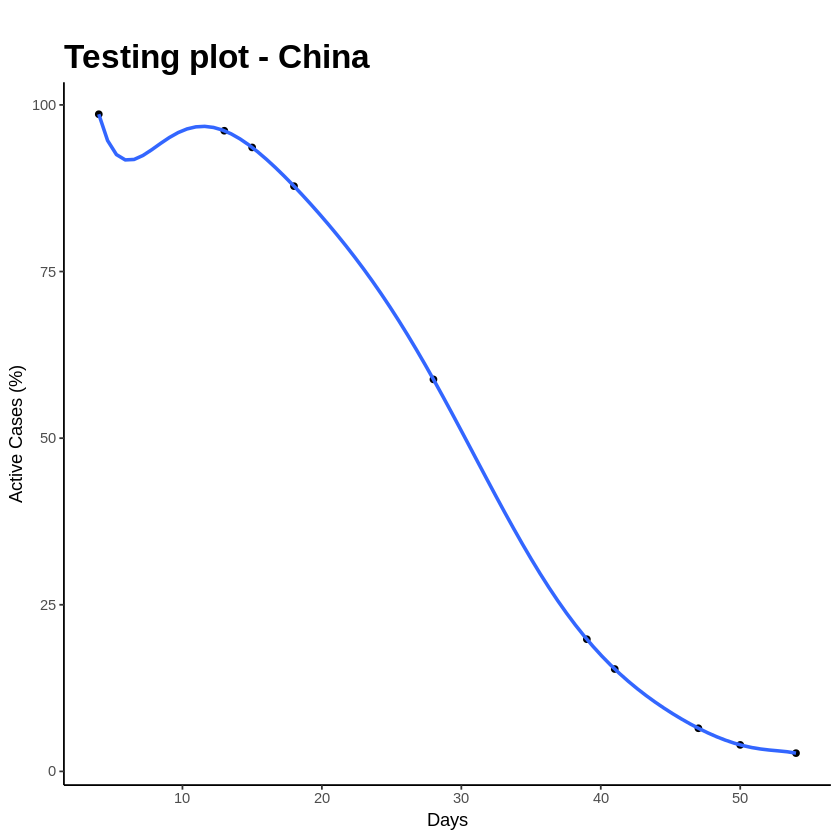

In [36]:
tester <- ggplot(test.data, aes(Day, percent_active) ) +
              geom_point() +
              stat_smooth(method = lm, formula = y ~ poly(x, deg, raw = TRUE)) +   # polynomial function
  
              # decoration
              labs( x = "Days", y = "Active Cases (%)", title = paste("\nTesting plot", rName, sep = " - ") ) +
              theme( plot.title = element_text(size = 20, face = "bold")) 
tester

In [37]:

### can be TESTED in case of any problem in the ABOVE PLOT ###

#  # pridiction by polynomial model
#  pred <- predict(model)   # fitting the model
#
#  plot(percent_active ~ Day, data = test.data)     #  "data = train.data"    is also possible
#  lines(train.data$Day, y=pred, col = "blue")


<br /><br />

In [38]:
trained = cbind( # Prediction for training data
            train.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(model, train.data)
          )

tested = cbind(  # Prediction for tested data
            test.data[,c("Day", "percent_active")],
            Pridicted_percent_active = predict(model, test.data)
         )


tail(trained, 10)
tail(tested, 10)

Warning message in predict.lm(model, train.data):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(model, test.data):
“prediction from a rank-deficient fit may be misleading”


,Day,percent_active,Pridicted_percent_active
46,46,7.264957,7.028472
48,48,5.229854,5.207400
49,49,4.372667,4.515810
51,51,3.437001,3.434026
52,52,3.024546,3.039478
53,53,2.798210,2.765560
55,55,2.636947,2.603338
56,56,2.602006,2.637141
57,57,2.676088,2.676320
58,58,2.882384,2.877786


,Day,percent_active,Pridicted_percent_active
4,4,98.604651,98.766358
13,13,96.125283,96.132517
15,15,93.620579,93.520020
18,18,87.811406,88.061024
28,28,58.815548,58.229060
39,39,19.832552,20.202200
41,41,15.361007,15.364710
47,47,6.473010,6.032602
50,50,3.977791,3.928741
54,54,2.740556,2.626145


<br /><hr /><br />

## Predictions

In [39]:
test_Miscellaneous = data.frame(
                        Day = NaN,
                        Confirmed = NaN,
                        Active.Cases = NaN,
                        percent_active = NaN,
                        percent_closed = NaN
                     )

In [42]:
# 13th March ---> day 52
dNo = 59    # get the day no. to pridict

test_Miscellaneous$'Day' = dNo

<br /> 
1. #### By Linear Model

In [43]:
# modeling variable  --->  fit
Prediction = cbind(
                test_Miscellaneous[,c("Day", "percent_active")],
                percent_pridicted = predict(fit, test_Miscellaneous)
             )
Prediction

Day,percent_active,percent_pridicted
59,NaN,NaN


<br /> 
2. #### By Polynomial Model

In [44]:
# modeling variable  --->  model
Prediction = cbind(
                test_Miscellaneous[,c("Day", "percent_active")],
                percent_pridicted = predict(model, test_Miscellaneous)
             )
Prediction

Warning message in predict.lm(model, test_Miscellaneous):
“prediction from a rank-deficient fit may be misleading”


Day,percent_active,percent_pridicted
59,NaN,4.103978


<hr /> <br />

In [45]:
# world on day 58
# 92.63192 ---> @deg = 16
# 88.90763 ---> @deg = 19